# 00. Probabilités, statistiques et concepts mathématiques

In [68]:
from IPython.display import HTML, Image #illustration
import pandas as pd
data = pd.read_csv("data/data.csv")
data.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95


## –– Sommaire

### A. Introduction aux probabilités

x Concept de probabilité  
x Théorème de Bayes

### B. Introduction aux statistiques

x Distribution et Théorème Central Limite  
• Espérance et Moyenne, Médiane, Mode  
• Dispersion : Variance, Écart-type  
• Forme : Skewness et Kurtosis  
x Concentration : Courbe de Lorenz, Indice de Gini https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4730366-familiarisez-vous-avec-les-mesures-de-concentration  
x Fréquences  
**Bonus** : moyenne harmonique, moyenne quadratique  

### C. Concepts mathématiques

• Biais, Poids et Degrés de liberté  
• Dérivées et Intégrales  
• Dérivées partielles    
• Gradient et Descente de gradient  
• Convexité et Concavité  
• Matrices, valeurs et vecteurs propres  
• Boosting, bagging  

---

## A. Introduction aux probabilités

https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites

## test
$$\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B)$$

## B. Introduction aux statistiques

$\sum$ : la somme de  
$x_i$ : une valeur de la série statistique  
$n$ : l'effectif

### –– Distribution et Théorème Central Limite :

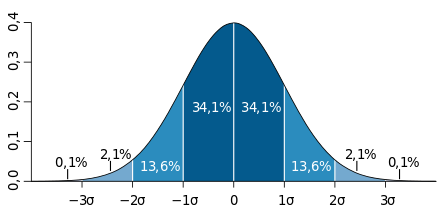

In [58]:
Image(filename='img/gauss.png', width="400")

EXPLIQUER LA NOTION DE DISTRIBUTION ET INTRODUIRE A LA DISTRIBUTION NORMALE PUIS AU THEO CENTRAL LIMITE

Petite demonstration du phénomène par notre ami <mark>Cédric Villani</mark> lors de sa conférence TED "What's so sexy about math?".

In [51]:
print("L'extrait qui nous intéresse se situe de 4:10 à 4:26") #illustration
HTML('<iframe width="400" height="255" src="https://www.youtube.com/embed/Kc0Kthyo0hU?start=250" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

L'extrait qui nous intéresse se situe de 4:10 à 4:26


---

### –– Espérance

TODO

### –– Moyenne $\mu$

Il existe différentes moyennes, mais quand on parle de moyenne, il s'agit toujours de la moyenne arithmétique.
La moyenne arithmétique (noté $\mu$) est égale à la somme de toutes les valeurs par le nombre de ces valeurs (l'effectif total).

$\mu=\dfrac{\sum{x_i}}{n}$  

In [52]:
print(data['usd_goal_real'].mean())

45454.40146545336


### –– Médiane

La médiane est la valeur centrale d’une série statistique — la moitié des observations lui sont inférieures ou égales et la moitié des observations lui sont supérieures ou égales.

In [5]:
print(data['usd_goal_real'].median())

5500.0


### –– Mode

Le mode pour un caractère discret est la valeur du caractère qui correspond à l'effectif le plus grand. Pour un caractère continu, on parle de classe modale. Le mode est pertinent lorsque dans la série, certaines valeurs sont répétées plusieurs fois. Il peut y avoir aucun, un seul ou plusieurs modes lorsque la distribution est dite *plurimodale*.

In [6]:
print(data['usd_goal_real'].mode())

0    5000.0
dtype: float64


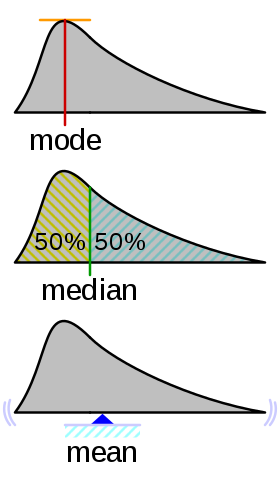

In [9]:
Image(filename='img/medmoymod.png', width="200")

### –– Variance $Var$

$Var = {\dfrac{\sum\limits_{i=1}^{n}{{\lvert x_i-\mu\rvert^2}}}{n}}$

In [39]:
print(data['backers'].var(ddof=0))

822982.5139464174


### –– Ecart-type (std) σ  

$σ = \sqrt{Var} = \sqrt{\dfrac{\sum\limits_{i=1}^{n}{{\lvert x_i-\mu\rvert^2}}}{n}}$

In [37]:
print(data['backers'].std(ddof=0))

907.1838369076123


### –– L'écart inter-quartiles ($IQR$)

$IQR = Q_3 - Q_1$

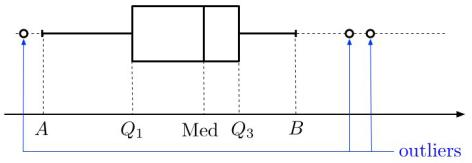

In [55]:
Image(filename='img/boxplot.jpg', width="400") #illustration

### –– Skewness $\gamma_1$

**Mesure d'asymétrie de la distribution**.  
L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale. On interprète cette mesure de cette manière :  
- $\gamma_1$ = 0 alors la distribution est symétrique. La valeur étudiée tend   
- $\gamma_1$ > 0 alors la distribution est s'étale davantage à droite (right-skewed).  
- $\gamma_1$ < 0 alors la distribution est s'étale davantage à gauche (left-skewed).

right-skewed (>0) vs. left-skewed (<0)


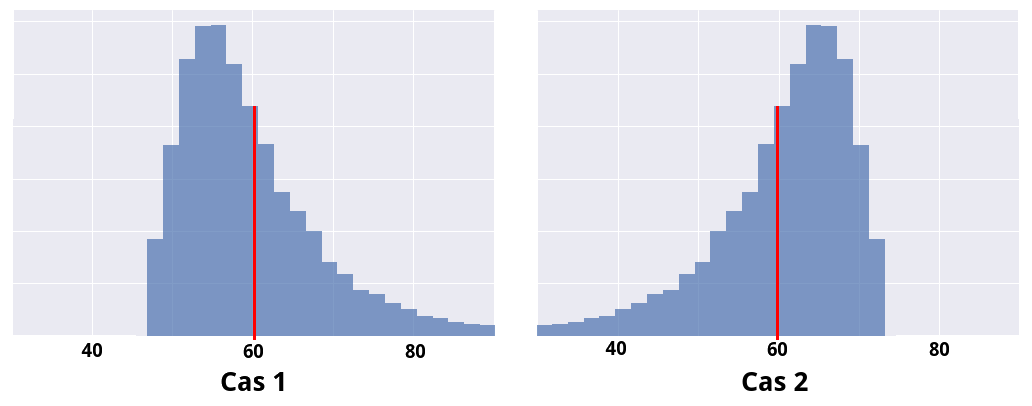

In [66]:
print("right-skewed (>0) vs. left-skewed (<0)")
Image(filename='img/skewness.png', width="500") #illustration

Dans le cas 1 (right-skewed), la valeur peut monter beaucoup plus haut que dans le cas 2.  
A l'inverse, dans le cas 2 (left-skewed), elle peut descendre beaucoup plus bas que dans le cas 1.  
En fonction de la valeur étudiée, une distribution peut apparaître plus risquée que l'autre.

In [49]:
print(data['backers'].skew())

86.76300900921687


### –– Kurtosis $\gamma_2$

**Mesure de l'applatissement de la distribitution**.  
On compare l'aplatissement par rapport à la distribution normale (ou courbe de Gauss).

- $\gamma_2$ = 0 : alors la distribution a le même aplatissement que la distribution normale.
- $\gamma_2$ < 0 : alors la distribution est plus aplatie (i.e. les observations sont mieux réparties entre les différentes valeurs).
- $\gamma_2$ > 0 : alors la distribution est moins aplatie (i.e. les observations sont très concentrées sur certaines valeurs et très peu sur d'autres).

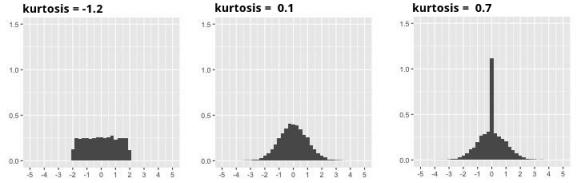

In [61]:
Image(filename='img/kurtosis.jpg', width="600") #illustration

In [50]:
print(data['backers'].kurtosis())

13954.938078466701


### –– Indice de Gini

L'indice de Gini mesure les inégalités de concentration d'une quantité. Il est compris entre 0 et 1.
- = 1 : le plus inégalitaire possible
- = 0 : le plus égalitaire possible

### –– Fréquence
fréquence d'une modalité = n / N

In [7]:
effectifs = data["main_category"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["main_category"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
tab

,main_category,n,f
0,Film & Video,63585,0.167921
1,Music,51918,0.137109
2,Publishing,39874,0.105303
3,Games,35231,0.093041
4,Technology,32569,0.086011
5,Design,30070,0.079411
6,Art,28153,0.074349
7,Food,24602,0.064971
8,Fashion,22816,0.060254
9,Theater,10913,0.028820


In [8]:
tab = tab.sort_values("main_category") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,main_category,n,f,F
6,Art,28153,0.074349,0.074349
10,Comics,10819,0.028572,0.102921
12,Crafts,8809,0.023264,0.126184
14,Dance,3768,0.009951,0.136135
5,Design,30070,0.079411,0.215546
8,Fashion,22816,0.060254,0.275801
0,Film & Video,63585,0.167921,0.443721
7,Food,24602,0.064971,0.508692
3,Games,35231,0.093041,0.601733
13,Journalism,4755,0.012557,0.614291


### –– Biais, Poids, Degrés de liberté

$$Var(\hat{f}(x)) = E(\hat{f}(x)^2)-E(\hat{f}(x))^2$$

$$Biais(\hat{f}(x)) = E(\hat{f}(x) - f(x))$$

$$Err(x) = Biais^2 + Var + ErreurIrreductible$$

### –– Moyenne harmonique

utilisée quand on veut trouver un bon compromis entre deux mesures a et b (toutes deux positives) où a grandit quand b diminue.  
En Machine Learning, cette moyenne est utilisée dans le cadre de la F-mesure, qui cherche à faire un compromis entre la mesure de rappel et la mesure de précision. La F-mesure utilise donc la moyenne harmonique du rappel et de la précision.



### –– Moyenne quadratique

utilisée pour évaluer la performance d'un modèle statistique. Exemple courant en Machine Learning, le *RMSE* (Root Mean Square Error).

## C. Concepts mathématiques

### –– Descente de gradient

La descente de gradient est une méthode de minimisation applicable aux fonctions différentiables. Le gradient indique en effet la direction de plus forte pente de la fonction ; si on suit la direction opposée au gradient, la fonction va donc décroître. L'algorithme de descente de gradient consiste à choisir un point au hasard, y évaluer le gradient de la fonction à minimiser, se déplacer dans la direction opposée à ce gradient, et réitérer jusqu'à ce que le gradient soit (à peu près) nul et la fonction donc localement minimale. Attention : si le problème n'est pas convexe, le minimum atteint par cet algorithme peut ne pas être global (d'où le « localement » dans la phrase précédente).

### –– 
Eigenvectors and eigenvalues are used to reduce noise in data. They can help us improve efficiency in computational intensive tasks. They also eliminate features that have a strong correlation between them and also help in reducing over-fitting.